In [1]:
# I appended a 0 vector for t=0 to t=48.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
D = 500  # Dose in mg
V = 49  # Volume of distribution in L
t_half = 6  # Half-life in hours
tau = 12  # Dosing interval in hours

# Calculated parameters
#Ke = np.log(2) / t_half  # Elimination rate constant
#CL = V * k  # Clearance
#Buelga 2005
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL/V)#hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  
print(Ke)
# Time array
t_max = 96  # time point when vancomycin drug admin stops
t_start = 48 #time point when drug admin begins
time = np.linspace(t_start, t_max, 1000)

delta_t = (t_max-t_start)/1000 #Maintain step size as in "time" variable above in case t_max and t_start are changed.
prev_time = int(48/delta_t)
prev_times = np.zeros_like(np.linspace(0,48,prev_time))

# Function to calculate concentration at any time t
def concentration(t, D, V, Ke, tau):
    conc = np.zeros_like(t)
    for i, time_point in enumerate(t):
        for n in range(int(time_point // tau) + 1):
            conc[i] += (D / V) * np.exp(-Ke * (time_point - n * tau))
    return conc

# Calculate concentration over time
conc = concentration(time, D, V, Ke, tau)
print(conc)

conc = np.concatenate((prev_times,conc)) 
print(conc.shape)

0.06783340116673449
[18.00950978 17.95090761 17.89249613 17.83427472 17.77624276 17.71839963
 17.66074472 17.60327742 17.54599712 17.4889032  17.43199506 17.3752721
 17.31873371 17.2623793  17.20620826 17.15022    17.09441393 17.03878944
 16.98334595 16.92808288 16.87299963 16.81809561 16.76337026 16.70882297
 16.65445318 16.60026031 16.54624378 16.49240301 16.43873745 16.3852465
 16.33192962 16.27878622 16.22581575 16.17301765 16.12039135 16.06793629
 16.01565192 15.96353767 15.91159301 15.85981737 15.80821021 15.75677098
 15.70549912 15.65439411 15.60345538 15.55268241 15.50207465 15.45163157
 15.40135263 15.35123729 15.30128503 15.2514953  15.2018676  15.15240137
 15.10309611 15.05395129 15.00496638 14.95614087 14.90747423 14.85896595
 14.81061552 14.76242241 14.71438613 14.66650615 14.61878197 14.57121308
 14.52379898 14.47653917 14.42943313 14.38248038 14.33568041 14.28903272
 14.24253683 14.19619223 14.14999843 14.10395494 14.05806128 14.01231696
 13.96672148 13.92127437 13.87597

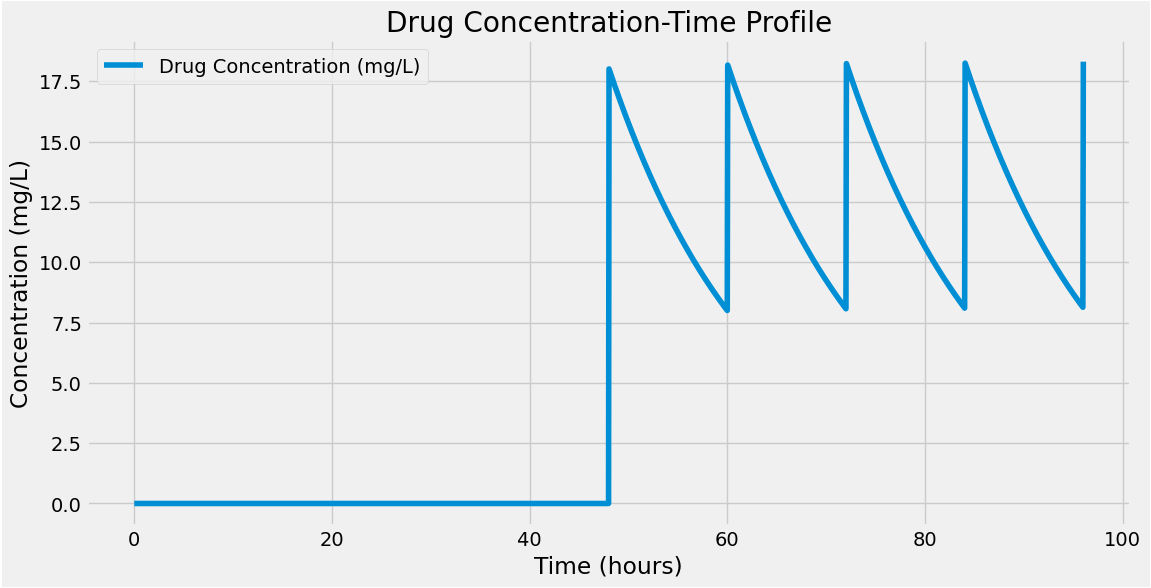

In [2]:
# Plot the concentration-time profile
#plt.rcParams['lines.linewidth'] = 1
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6), linewidth = 1.0)
ax.plot(np.linspace(0,96,2000), conc, label='Drug Concentration (mg/L)')
#ax.plot(time, conc, label='Drug Concentration (mg/L)')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Concentration (mg/L)')
ax.set_title('Drug Concentration-Time Profile')
plt.legend()
plt.grid(True)
plt.savefig("concentration-time")

In [5]:
#Staph aureus
#intrinsic growtrh rate: rho = 0.35 hour^-1
#vancomycin-induced death rate: 
#0.0958 - 0.1458, 0.1 - 0.1208
#0.166, 0.208, 0.625
#vancomycin resistant: 0.0833



# ODE system parameters
#0.6931 assuming SA doubling time of 60 minutes
#0.3466 assuming doubling time of 120 minutes
rho = 0.3466 #both sensitive and resistant SA are growing at the same rate
k = 10e5# or 10e6
#death rate for sensitive >>> death rate for resistant bacteria 
deltaS = 0.8 #death rate sensitive
deltaR = 0.0002#death rate resistant
S = 20
R = 10
r = [S, R]
EC_50 = 0.03

print(time)

# It looks like time needed to be redefined to include 0-48h.
time = np.linspace(0,t_max, 2000)

# System ODE
def system_ode(t, r):
    S = r[0]
    R = r[1]
    conc_t = np.interp(t, time, conc)
    dSdt = (1 - (conc_t / (conc_t + EC_50)) * rho * S*(1 - (S + R) / k)) - deltaS * S
    dRdt = rho * R * (1 - (S + R) / k) - deltaR * R
    return [dSdt, dRdt]

ode_soln = solve_ivp(system_ode, t_span=[0, t_max], y0=[2, 2], t_eval=time)







[48.         48.04804805 48.0960961  48.14414414 48.19219219 48.24024024
 48.28828829 48.33633634 48.38438438 48.43243243 48.48048048 48.52852853
 48.57657658 48.62462462 48.67267267 48.72072072 48.76876877 48.81681682
 48.86486486 48.91291291 48.96096096 49.00900901 49.05705706 49.10510511
 49.15315315 49.2012012  49.24924925 49.2972973  49.34534535 49.39339339
 49.44144144 49.48948949 49.53753754 49.58558559 49.63363363 49.68168168
 49.72972973 49.77777778 49.82582583 49.87387387 49.92192192 49.96996997
 50.01801802 50.06606607 50.11411411 50.16216216 50.21021021 50.25825826
 50.30630631 50.35435435 50.4024024  50.45045045 50.4984985  50.54654655
 50.59459459 50.64264264 50.69069069 50.73873874 50.78678679 50.83483483
 50.88288288 50.93093093 50.97897898 51.02702703 51.07507508 51.12312312
 51.17117117 51.21921922 51.26726727 51.31531532 51.36336336 51.41141141
 51.45945946 51.50750751 51.55555556 51.6036036  51.65165165 51.6996997
 51.74774775 51.7957958  51.84384384 51.89189189 51.

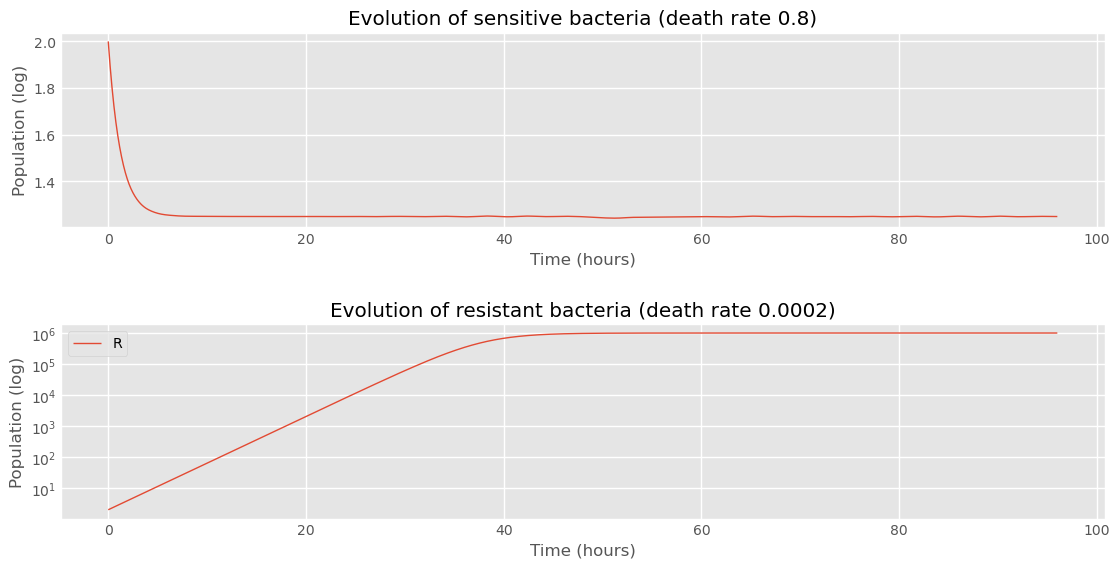

In [7]:
# Plot the ODE solution
plt.rcParams['lines.linewidth'] = 1
plt.style.use('ggplot')
fig, ax = plt.subplots(2, figsize=(12, 6))

plt.yscale("log")
ax[0].plot(ode_soln.t, ode_soln.y[0], label='S')
ax[1].plot(ode_soln.t, ode_soln.y[1], label='R')
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Population (log)')
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Population (log)')
ax[0].set_title('Evolution of sensitive bacteria (death rate 0.8)')
ax[1].set_title('Evolution of resistant bacteria (death rate 0.0002)')
fig.subplots_adjust(hspace= 0.5, wspace=0.2)  # Adjust horizontal space between plots
plt.legend()
plt.grid(True)
plt.savefig('2024-08-27Resistant0.0002.png')

## Calculating model parameters for vancomycin

In [11]:
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)# ml/min
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL)/(V)# hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  
print(Ke)

0.06783340116673449


In [12]:
eCCr = (140 - 60)*70/(72*1.2)#mL/min
print(eCCr)

64.81481481481482


## Vancomycin CL from Buelga 2005

In [13]:
Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
print(Vanco_CL)

3.6008230452674903


In [14]:
t_half = 6  # Half-life in hours
#tau = 12  # Dosing interval in hours

# Calculated parameters
Ke = np.log(2) / t_half  # Elimination rate constant
new_Ke = Ke
print(new_Ke)

0.11552453009332421


In [15]:
Ke = 0.00083*eCCr + 0.0044
Ke

0.05819629629629631